In [ ]:
# Install necessary libraries
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations=10
locations=[(random.randint(0,100),random.randint(0,100)) for i in range(num_locations)]
depot=(45,45)
num_vehicles=3

In [ ]:
locations

[(66, 70),
 (41, 35),
 (15, 45),
 (49, 1),
 (14, 81),
 (31, 60),
 (38, 27),
 (29, 26),
 (21, 67),
 (2, 51)]

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def calculate_distance(l1,l2):
  return ((l1[0]-l2[0])**2 + (l1[1]-l2[1])**2) ** 0.5

In [ ]:
def evalVRP(individual):
    total_distance = 0
    distances = []
    current_location = depot
    routes = [[] for _ in range(num_vehicles)]
    for i, index in enumerate(individual):
        vehicle_index = i % num_vehicles
        routes[vehicle_index].append(index)

    for route in routes:
        if not route:
            continue
        route_distance = 0
        current_location = depot
        for index in route:
            route_distance += calculate_distance(current_location, locations[index])
            current_location = locations[index]

        route_distance += calculate_distance(current_location, depot)
        distances.append(route_distance)
        total_distance += route_distance

    if len(distances) > 1:
        std_dev = np.std(distances)
    else:
        std_dev = 0.0

    return total_distance, std_dev

In [ ]:
toolbox.register("evaluate", evalVRP)

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)

In [ ]:
import matplotlib.pyplot as plt

def plot_routes(individual, title="Routes"):
    """
    Plots the routes for the vehicles with unique colors for each vehicle's route.

    Args:
        individual (list): The solution as a list of customer indices.
        title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 8))
    plt.scatter(*depot, color='red', s=100, label='Depot')
    for i, (x, y) in enumerate(locations):
        plt.scatter(x, y, color='blue')
        plt.text(x, y, f'Customer {i}', fontsize=12, ha='right')

    # Predefined colors for vehicles
    colors = ['blue', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'yellow']

    # Initialize routes for each vehicle
    routes = [[] for _ in range(num_vehicles)]
    for i, index in enumerate(individual):
        vehicle_index = i % num_vehicles
        routes[vehicle_index].append(index)

    # Plot routes for each vehicle
    for vehicle_index, route in enumerate(routes):
        if not route:
            continue
        current_location = depot
        route_color = colors[vehicle_index % len(colors)]  # Cycle through predefined colors
        for index in route:
            next_location = locations[index]
            plt.plot([current_location[0], next_location[0]], [current_location[1], next_location[1]],
                     color=route_color, linestyle='-', linewidth=2)
            current_location = next_location
        # Return to depot
        plt.plot([current_location[0], depot[0]], [current_location[1], depot[1]],
                 color=route_color, linestyle='-', linewidth=2)

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid()
    plt.show()

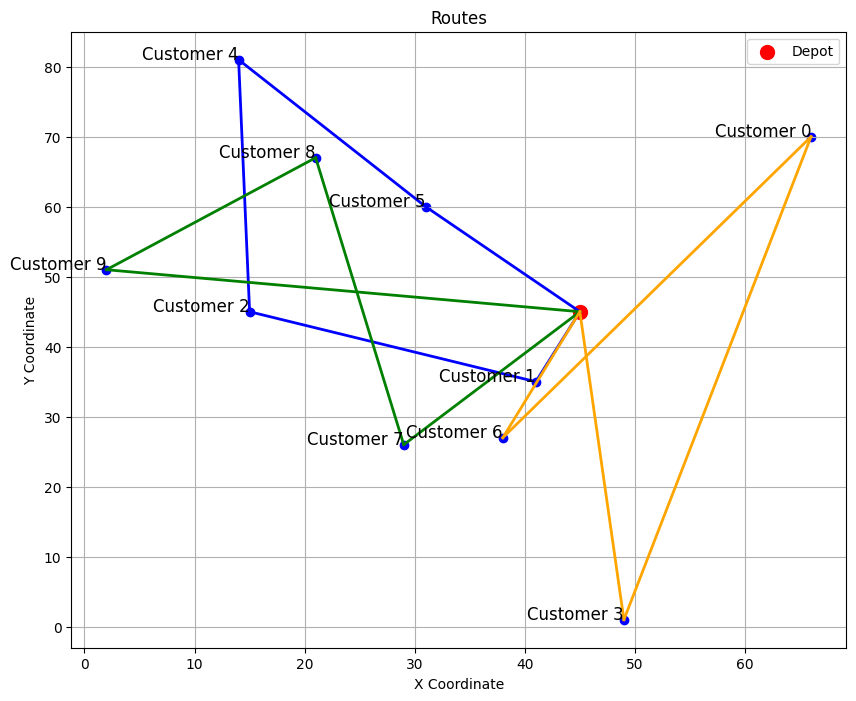

In [ ]:
plot_routes(toolbox.individual())